In [2]:
import os
import sys
from pathlib import Path

import pandas as pd

# Add project root to Python path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Import processors
from analyzers.sentiment_analyzer import (
    SentimentAnalyzer
)

import matplotlib.pyplot as plt

/tmp/ipykernel_287535/2291673848.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/projects/music-social-network-analysis/music_yt_analysis_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/projects/music-social-network-analysis/music_yt_analysis_env/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `to

In [3]:
OUTPUT_DIR = Path('../../images')

## Load data

In [4]:
comments_df = pd.read_csv(Path('../data/processed/youtube_comments_luther_processed_topic.csv'))

In [5]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21229 entries, 0 to 21228
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            21229 non-null  object
 1   video_id      21229 non-null  object
 2   parent_id     13179 non-null  object
 3   author        21225 non-null  object
 4   text          21229 non-null  object
 5   published_at  21229 non-null  object
 6   likes         21229 non-null  int64 
 7   is_reply      21229 non-null  bool  
 8   video_title   21229 non-null  object
 9   category      21229 non-null  object
 10  topic         21229 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.6+ MB


In [6]:
comments_df.head()

,id,video_id,parent_id,author,text,published_at,likes,is_reply,video_title,category,topic
0,UgxHLK6T175yluj-QM14AaABAg,HfWLgELllZs,NaN,@thebsmoke,flow 🔥the beat 🔥the melody 🔥the vibe 🔥,2024-11-22T19:26:02Z,19967,False,Kendrick Lamar - luther (Official Audio),official,love_kendrick_sza
1,UgxHLK6T175yluj-QM14AaABAg.AB9MwSW6WhFAB9fOdTRrng,HfWLgELllZs,UgxHLK6T175yluj-QM14AaABAg,@montassarkhdhir9854,lyric 🔥,2024-11-22T22:16:03Z,240,True,Kendrick Lamar - luther (Official Audio),official,love_kendrick_sza
2,UgxHLK6T175yluj-QM14AaABAg.AB9MwSW6WhFAB9oQscsPGg,HfWLgELllZs,UgxHLK6T175yluj-QM14AaABAg,@tsudot9800,@@montassarkhdhir9854 album 🔥,2024-11-22T23:35:00Z,159,True,Kendrick Lamar - luther (Official Audio),official,like_video_drake
3,UgxHLK6T175yluj-QM14AaABAg.AB9MwSW6WhFAB9ssCqghcr,HfWLgELllZs,UgxHLK6T175yluj-QM14AaABAg,@LoganDavis-p4j,right 👍,2024-11-23T00:13:49Z,55,True,Kendrick Lamar - luther (Official Audio),official,like_video_drake
4,UgxHLK6T175yluj-QM14AaABAg.AB9MwSW6WhFABAOYMlTF_w,HfWLgELllZs,UgxHLK6T175yluj-QM14AaABAg,@marlynnjones1355,love,2024-11-23T04:59:20Z,35,True,Kendrick Lamar - luther (Official Audio),official,love_kendrick_sza


In [7]:
# Get min and max dates to see data collection timeframe
print("Data collection timeframe:")
print(f"From: {comments_df['published_at'].min()}")
print(f"To: {comments_df['published_at'].max()}")


Data collection timeframe:
From: 2024-11-22T17:09:29Z
To: 2025-05-23T22:54:57Z


In [8]:
videos_df = pd.read_csv(Path('../data/raw/youtube_videos_luther.csv'))

In [9]:
videos_df

,id,title,channel,published_at,views,likes,comments,category
0,HfWLgELllZs,Kendrick Lamar - luther (Official Audio),Kendrick Lamar,2024-11-22T17:08:32Z,115216449,968284,21233,official
1,sNY_2TEmzho,Kendrick Lamar & SZA - luther (Official Music ...,KendrickLamarVEVO,2025-04-11T16:01:32Z,23485041,1070559,56217,official
2,DH5oKK2KRsU,Kendrick Lamar - luther (Letra/Lyrics),Vibe Music,2024-12-27T14:47:09Z,1658997,12736,365,repost
3,himeAlEJXf4,Kendrick Lamar - luther (Ft. SZA) - FANTANO RE...,Archie,2024-11-22T21:56:11Z,78945,1709,121,reaction
4,Kn8DZJOgg-M,KENDRICK LAMAR & SZA DROPPED A MOVIE! Luther (...,Scru Face Jean,2025-04-11T17:48:20Z,133134,11748,1424,reaction
5,YwtwK-itEyU,Kendrick Lamar - luther - UNCUT REACTION MASHUP,TRG - The Reactors Guild,2024-12-03T18:45:36Z,637533,17056,602,reaction
6,AiTnshH_v3A,Kendrick Lamar & SZA - luther (Official Music ...,LawTWINZ,2025-04-11T18:52:17Z,66115,5114,359,reaction
7,3KLG3Q53B7s,The artistic triumph of the 'Luther' Video - K...,Professor Skye's Record Review,2025-04-11T20:00:06Z,72415,5577,738,analysis
8,a4d9IcaYpVM,Kendrick's 'Luther': A Cinematic Masterpiece A...,Rap Philosophy,2025-04-15T23:54:37Z,7190,574,99,analysis
9,OcC5nNgNHX8,Kendrick Lamar's Luther: The Most Underwhelmin...,Rap Critic,2025-02-21T14:30:05Z,14997,757,326,analysis


## Sentiment Analysis

### General

#### Using Pretrained Roberta

In [10]:
sentiment_analyzer = SentimentAnalyzer(model_type='roberta')

/home/projects/music-social-network-analysis/music_yt_analysis_env/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/projects/music-social-network-analysis/music_yt_analysis_env/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with

Using device: cuda


In [11]:
comments_df['text'] = comments_df['text'].astype(str)

In [13]:
comments_df['sentiment'] = comments_df['text'].apply(lambda x: sentiment_analyzer.analyze_sentiment(x)['label'])

In [14]:
comments_df[['text', 'sentiment']]

,text,sentiment
0,flow 🔥the beat 🔥the melody 🔥the vibe 🔥,positive
1,lyric 🔥,positive
2,@@montassarkhdhir9854 album 🔥,positive
3,right 👍,positive
4,love,positive
...,...,...
21224,like szas part better,neutral
21225,zzzzzzzzz booooring,neutral
21226,trippin,neutral
21227,kendriks part lame,negative


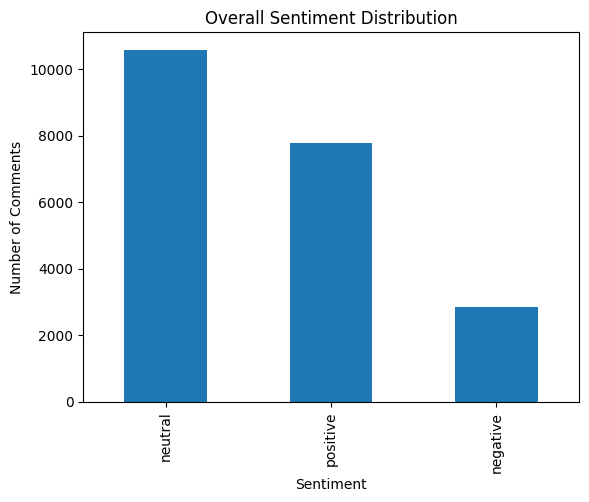

In [15]:
sentiment_counts = comments_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.savefig(os.path.join(OUTPUT_DIR, 'overall_sentiment_distribution.png'), dpi=500)

plt.show()

#### Using Vader 

In [16]:
vader_sentiment_analyzer = SentimentAnalyzer()

In [17]:
vader_comments_df = comments_df.copy()
vader_comments_df['text'] = vader_comments_df['text'].astype(str)
vader_comments_df['sentiment'] = vader_comments_df['text'].apply(lambda x: vader_sentiment_analyzer.analyze_sentiment(x)['label'])

In [18]:
vader_comments_df[['text', 'sentiment']]

,text,sentiment
0,flow 🔥the beat 🔥the melody 🔥the vibe 🔥,neutral
1,lyric 🔥,neutral
2,@@montassarkhdhir9854 album 🔥,neutral
3,right 👍,neutral
4,love,positive
...,...,...
21224,like szas part better,positive
21225,zzzzzzzzz booooring,neutral
21226,trippin,neutral
21227,kendriks part lame,negative


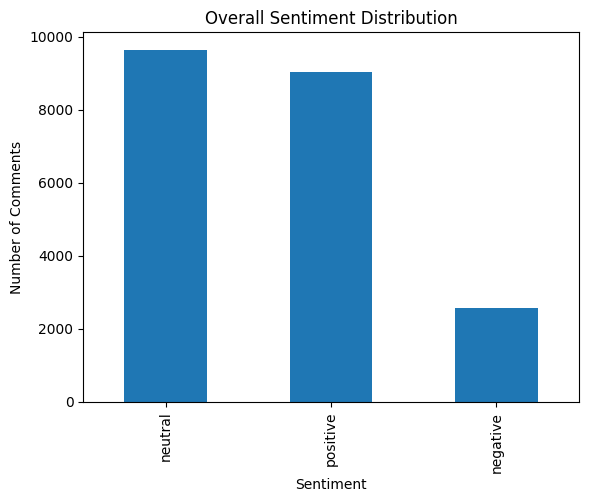

In [19]:
vader_sentiment_counts = vader_comments_df['sentiment'].value_counts()
vader_sentiment_counts.plot(kind='bar', title='Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.savefig(os.path.join(OUTPUT_DIR, 'vader_overall_sentiment_distribution.png'), dpi=500)

plt.show()

In [20]:
comments_df[comments_df['sentiment'] == 'positive']['text']


0                   flow 🔥the beat 🔥the melody 🔥the vibe 🔥
1                                                  lyric 🔥
2                            @@montassarkhdhir9854 album 🔥
3                                                  right 👍
4                                                     love
                               ...                        
21185                                                    🤍
21190                                                    2
21192    great song! created easy guitar tab 🎸 ! try li...
21211                             haha joking like mt joke
21221                                           see better
Name: text, Length: 7792, dtype: object

#### Comparison

Text(20.847222222222214, 0.5, 'Number of Comments')

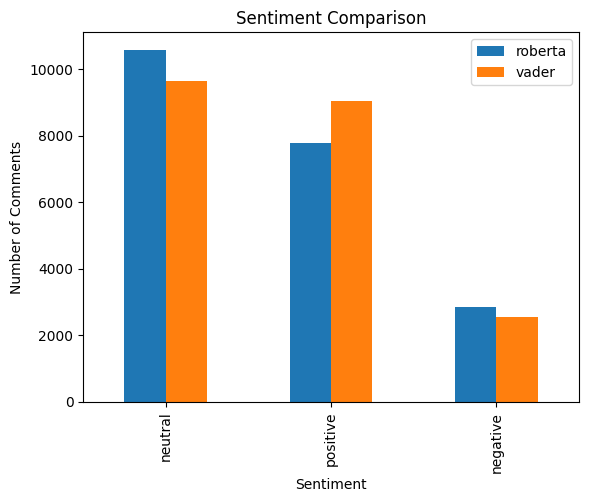

In [21]:
sentiments_comparison = pd.DataFrame({
    'roberta': comments_df['sentiment'].value_counts(),
    'vader': vader_comments_df['sentiment'].value_counts()
})
sentiments_comparison.plot(kind='bar', title='Sentiment Comparison')
plt.xlabel('Sentiment')
plt.savefig(os.path.join(OUTPUT_DIR, 'sentiment_distribution_comparison.png'), dpi=500)

plt.ylabel('Number of Comments')

In [22]:
# Create a DataFrame with text and sentiments from both models
sentiment_comparison_df = pd.DataFrame({
    'text': comments_df['text'],
    'roberta_sentiment': comments_df['sentiment'],
    'vader_sentiment': vader_comments_df['sentiment']
})

# Display the first few rowsb
sentiment_comparison_df[['text', 'roberta_sentiment', 'vader_sentiment']]


,text,roberta_sentiment,vader_sentiment
0,flow 🔥the beat 🔥the melody 🔥the vibe 🔥,positive,neutral
1,lyric 🔥,positive,neutral
2,@@montassarkhdhir9854 album 🔥,positive,neutral
3,right 👍,positive,neutral
4,love,positive,positive
...,...,...,...
21224,like szas part better,neutral,positive
21225,zzzzzzzzz booooring,neutral,neutral
21226,trippin,neutral,neutral
21227,kendriks part lame,negative,negative


### Sentiment Overtime

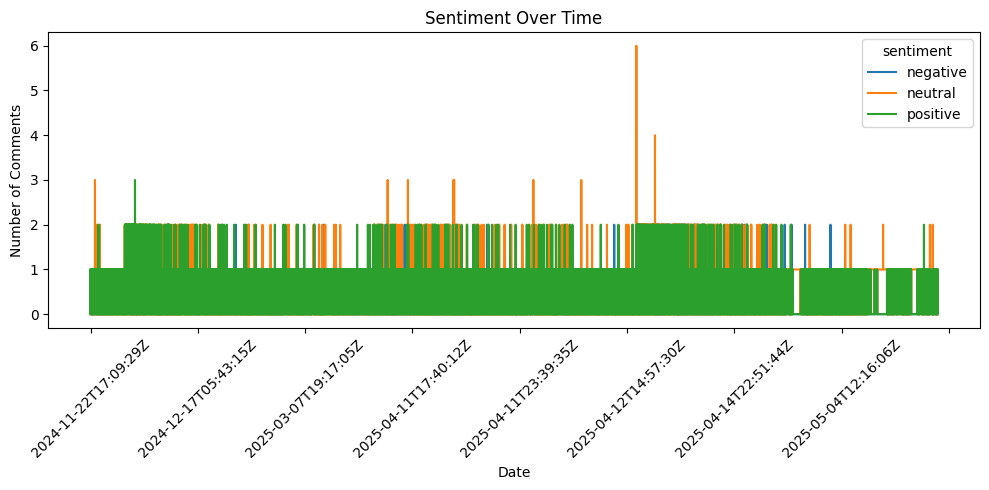

In [23]:
daily_sentiment = comments_df.groupby(['published_at', 'sentiment']).size().unstack(fill_value=0)
daily_sentiment.plot(kind='line', figsize=(10, 5), title='Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'overall_sentiment_overtime.png'), dpi=500)

plt.show()

### Categorical 

In [24]:
# Group comments by video_id and sentiment, count occurrences
video_sentiments = comments_df.groupby(['video_id', 'sentiment']).size().unstack(fill_value=0)

/tmp/ipykernel_287535/896138369.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

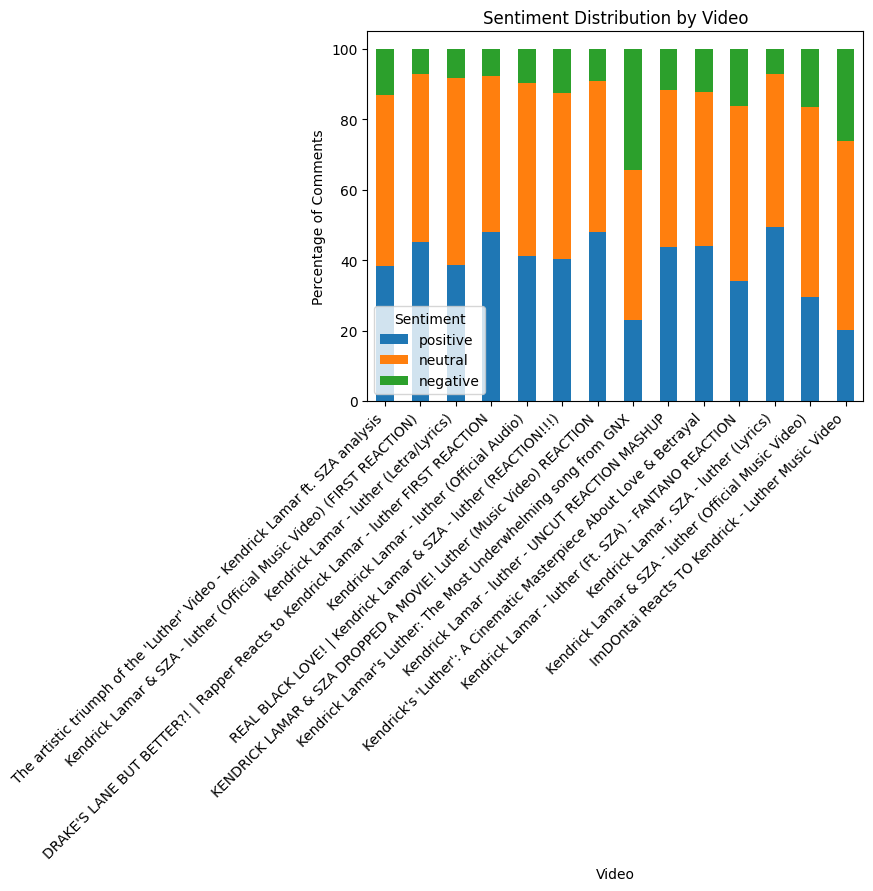

In [26]:
# Calculate percentages for each video
video_sentiment_pcts = video_sentiments.div(video_sentiments.sum(axis=1), axis=0) * 100

# Merge with videos dataframe to get video titles
video_analysis = pd.merge(
    video_sentiment_pcts.reset_index(),
    videos_df[['id', 'title', 'category']],
    left_on='video_id',
    right_on='id'
)

# Plot sentiment distribution for each video
plt.figure(figsize=(15, 8))
video_analysis[['positive', 'neutral', 'negative']].plot(
    kind='bar',
    stacked=True,
    title='Sentiment Distribution by Video'
)
plt.xlabel('Video')
plt.ylabel('Percentage of Comments')
plt.xticks(range(len(video_analysis)), video_analysis['title'], rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'sentiment_distribution_video.png'), dpi=500)

plt.show()

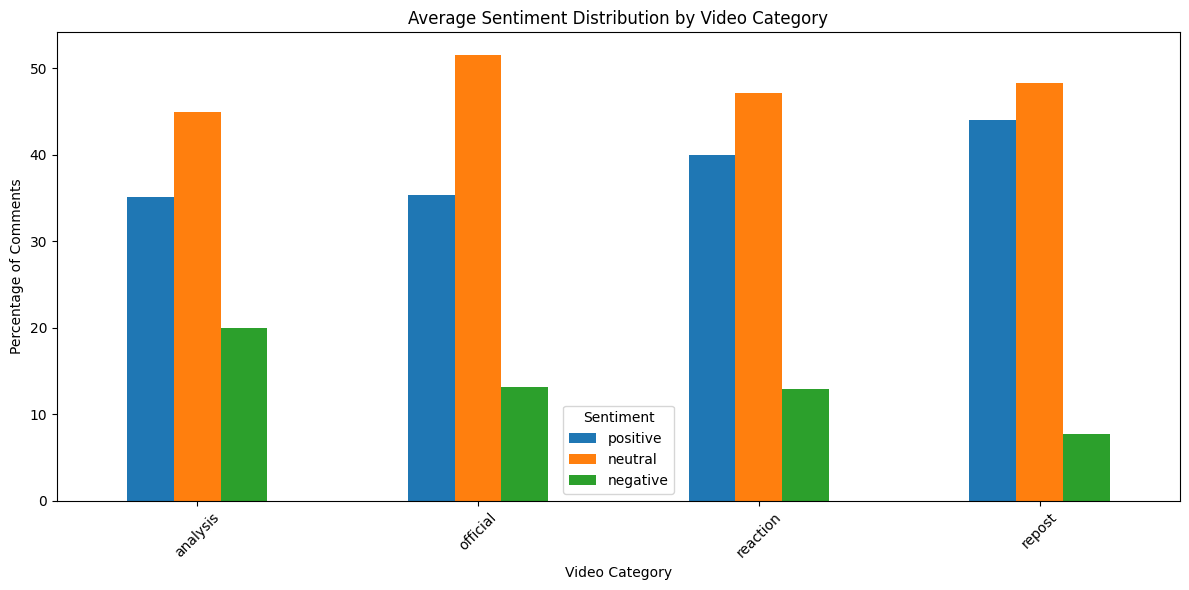

In [27]:
# Plot sentiment distribution by video category
category_sentiments = video_analysis.groupby('category')[['positive', 'neutral', 'negative']].mean()

ax = category_sentiments.plot(
    kind='bar', 
    figsize=(12, 6),
    title='Average Sentiment Distribution by Video Category'
)
plt.xlabel('Video Category')
plt.ylabel('Percentage of Comments')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'sentiment_distribution_category.png'), dpi=500)

plt.show()

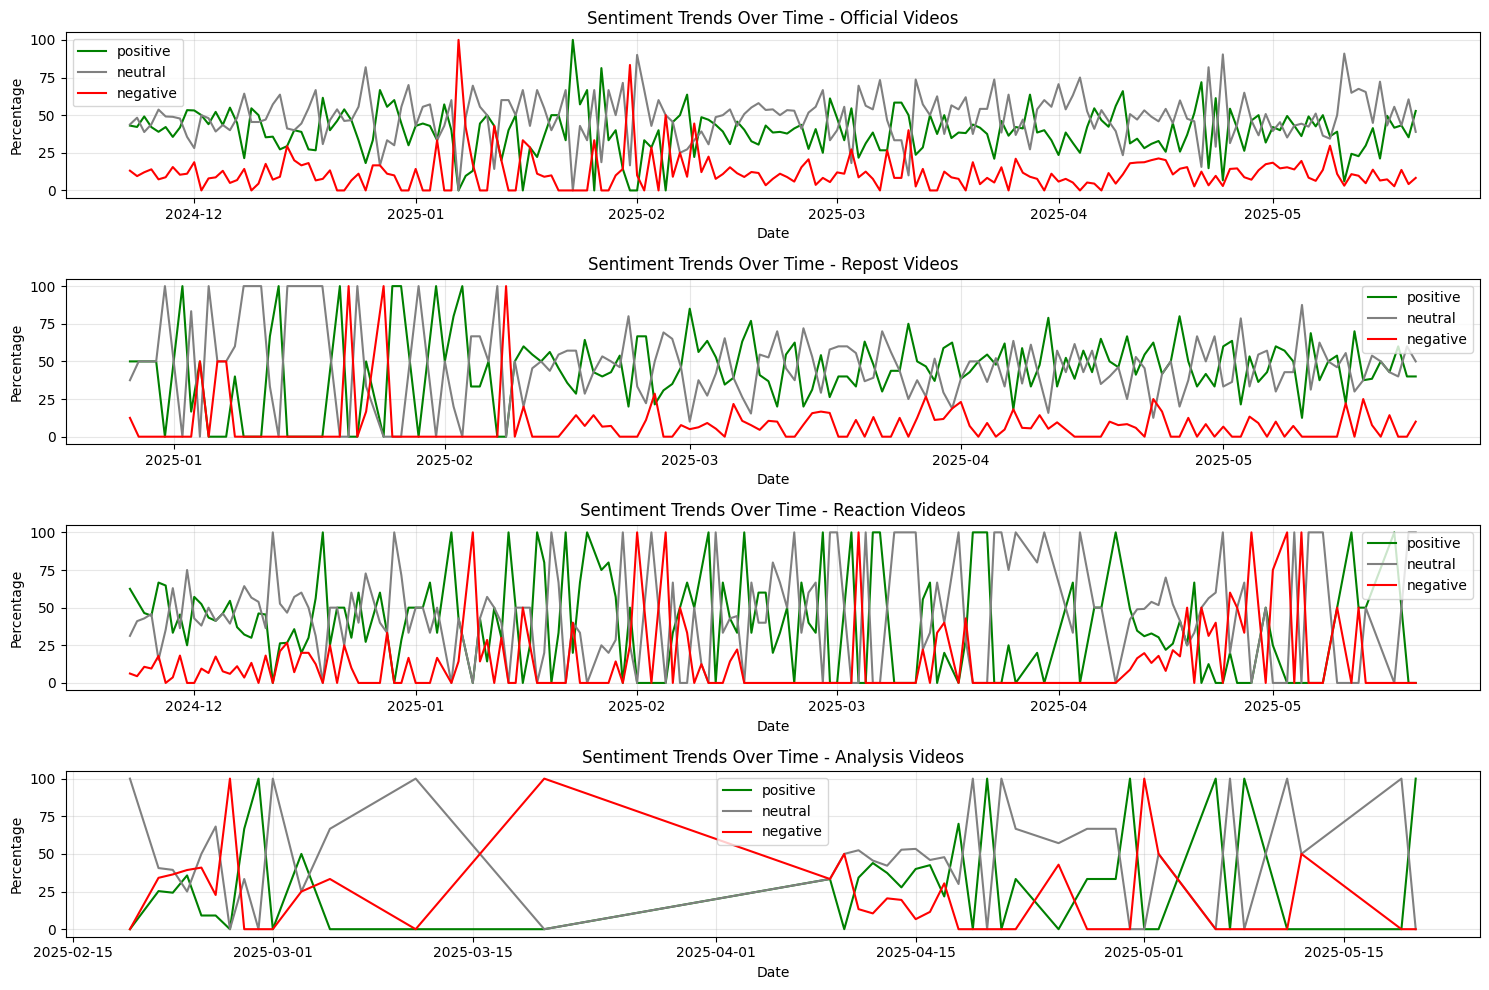

In [28]:
# Convert published_at to datetime
comments_df['published_at'] = pd.to_datetime(comments_df['published_at'])

# Create daily sentiment counts by category
daily_sentiments = comments_df.groupby([
    pd.Grouper(key='published_at', freq='D'),
    'category',
    'sentiment'
]).size().unstack(fill_value=0)

# Calculate percentages
daily_sentiment_pcts = daily_sentiments.div(daily_sentiments.sum(axis=1), axis=0) * 100

# Plot sentiment trends by category
plt.figure(figsize=(15, 10))

categories = comments_df['category'].unique()
colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}

for i, category in enumerate(categories):
    category_data = daily_sentiment_pcts[daily_sentiment_pcts.index.get_level_values('category') == category]
    
    plt.subplot(len(categories), 1, i+1)
    
    for sentiment in ['positive', 'neutral', 'negative']:
        plt.plot(
            category_data.index.get_level_values('published_at'),
            category_data[sentiment],
            label=sentiment,
            color=colors[sentiment]
        )
    
    plt.title(f'Sentiment Trends Over Time - {category.title()} Videos')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'sentiment_trends_category.png'), dpi=500)

plt.show()


#### Multiple video commentors

In [29]:
multi_video_comments_df = pd.read_csv(Path('../data/processed/multi_video_comments_luther.csv'))

In [30]:
multi_video_comments_df['sentiment'] = multi_video_comments_df['comment_text'].apply(lambda x: sentiment_analyzer.analyze_sentiment(x)['label'])

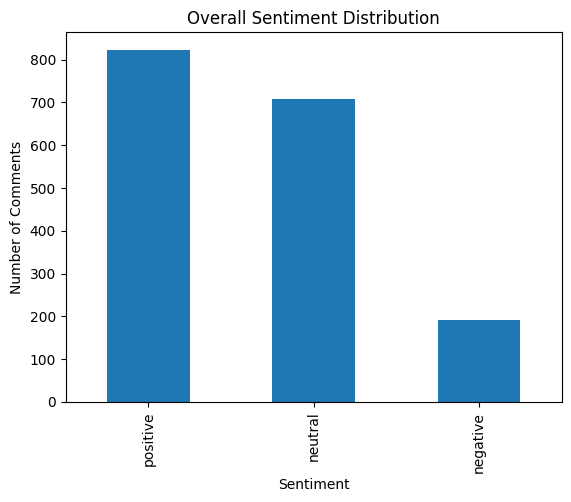

In [31]:
multi_video_sentiment_counts = multi_video_comments_df['sentiment'].value_counts()
multi_video_sentiment_counts.plot(kind='bar', title='Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.savefig(os.path.join(OUTPUT_DIR, 'multi_video_sentiment_distribution.png'), dpi=500)
plt.show()

In [30]:
multi_video_comments_df

,author,video_title,comment_text,sentiment
0,@feliciadavis881,Kendrick Lamar & SZA - luther (Official Music ...,video cinematic soulful love ❤❤grown folk music 🎶,positive
1,@feliciadavis881,KENDRICK LAMAR & SZA DROPPED A MOVIE! Luther (...,video cinematic soulful iove it❤❤,positive
2,@THEVERANO21,Kendrick Lamar - luther (Official Audio),sza sent,neutral
3,@THEVERANO21,Kendrick Lamar & SZA - luther (Official Music ...,NaN,neutral
4,@sammc2601,Kendrick Lamar - luther (Official Audio),damn. hang there. stay get out.,negative
...,...,...,...,...
1716,@BLxM559,Kendrick Lamar & SZA - luther (Official Music ...,sza working girl that’s drake wanna,neutral
1717,@BLxM559,KENDRICK LAMAR & SZA DROPPED A MOVIE! Luther (...,look like sza working girl. tripping?,neutral
1718,@BLxM559,The artistic triumph of the 'Luther' Video - K...,sza working girl that’s drake wanna,neutral
1719,@jadavella4623,Kendrick Lamar & SZA - luther (Official Music ...,sza look amazing red hair 💯🔥,positive


#### Topic

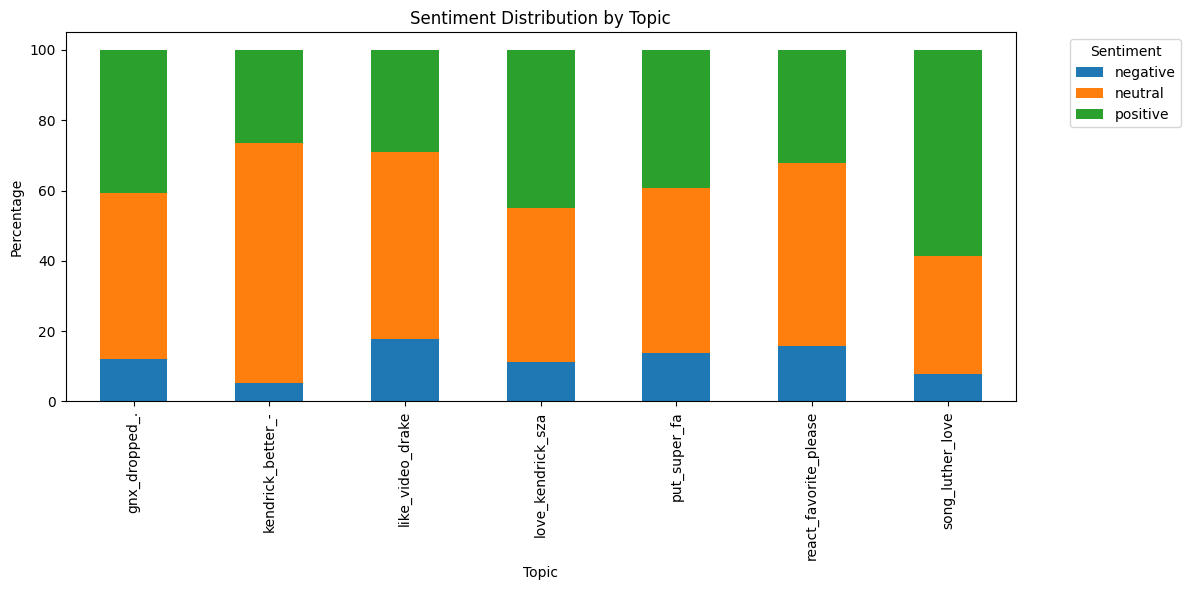

In [32]:
# Plot sentiment distribution by topic
topic_sentiment_df = comments_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)
topic_sentiment_percentages = topic_sentiment_df.div(topic_sentiment_df.sum(axis=1), axis=0) * 100

ax = topic_sentiment_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'topic_sentiment_distribution.png'), dpi=500, bbox_inches='tight')
plt.show()
